# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is a medium project of ***Machine Learning***. 

In this project, I performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

After getting to know the data set quickly, I will perform ***Exploratory Data Analysis***. I should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then I will spesify the different variables to use for cluster analysis.

Finally, I should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

---
---

# Tasks



#### Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### Exploratory Data Analysis (EDA)


#### Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. I will try to segment these customers based on the details given. 

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import cufflinks as cf
#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
#To display the plots
%matplotlib inline

# !pip install skimpy
from skimpy import clean_columns
import scipy.stats as stats
from scipy.stats import skew, kurtosis

# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

#### Load Dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


#### Explore Data

You can rename columns to more usable, if you need.

In [3]:
df = clean_columns(df,replace={ "\W" : "", "\d" : ""})
df

5 column names have been cleaned

,customer_id,gender,age,annual_income_k,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customer_id      200 non-null    int64 
 1   gender           200 non-null    object
 2   age              200 non-null    int64 
 3   annual_income_k  200 non-null    int64 
 4   spending_score   200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isna().sum()

customer_id        0
gender             0
age                0
annual_income_k    0
spending_score     0
dtype: int64

In [6]:
df.drop("customer_id", axis=1).duplicated().sum()

0

In [7]:
df.shape

(200, 5)

In [8]:
df.describe()

,customer_id,age,annual_income_k,spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
df.describe(include="object").T

,count,unique,top,freq
gender,200,2,Female,112


In [10]:
for col in df.columns:
    print(f"The column '{col}' has {df[col].nunique()} uniques:")
    print(df[col].unique())

The column 'customer_id' has 200 uniques:
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200]
The column 'gender' has 2 uniques:
['Male' 'Female']
The column 'age' has 51 uniques:
[19 21 20 23 31 22 35 64 30 67 58 24 37 52 25 46 54 29 45 4

In [11]:
# as we don't need the id column, we can drop it
df.drop("customer_id", axis=1, inplace=True)

---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, we need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps us to internalize the data.





<Figure size 2400x1600 with 0 Axes>

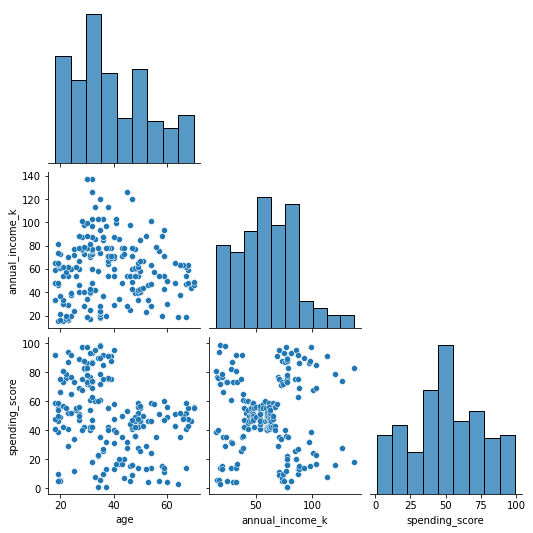

In [12]:
plt.figure(figsize=(12,8),dpi=200)
sns.pairplot(df,corner=True);

<AxesSubplot:>

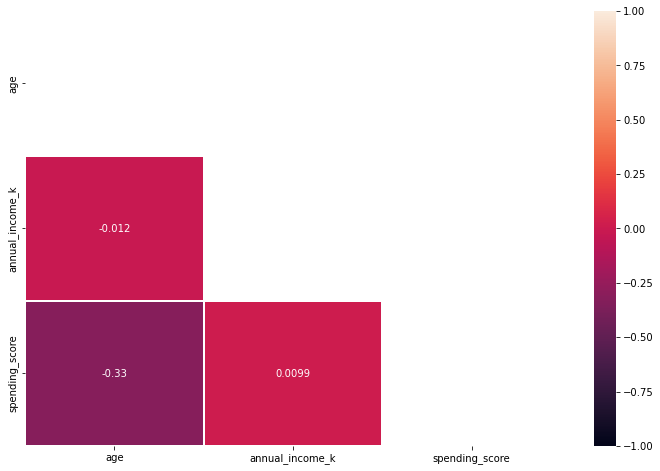

In [13]:
plt.figure(figsize=(12,8))

df_corr = df.corr()
mask = np.triu(np.ones_like(df_corr, dtype=bool))

sns.heatmap(df_corr, mask=mask, vmax=1, vmin=-1, linewidths=-0.1, annot=True)

In [14]:
df.drop(columns="gender").iplot(kind="hist")

In [15]:
df.drop("gender",axis=1).iplot(kind="box")

There is no missing values and outliers

<AxesSubplot:xlabel='annual_income_k', ylabel='spending_score'>

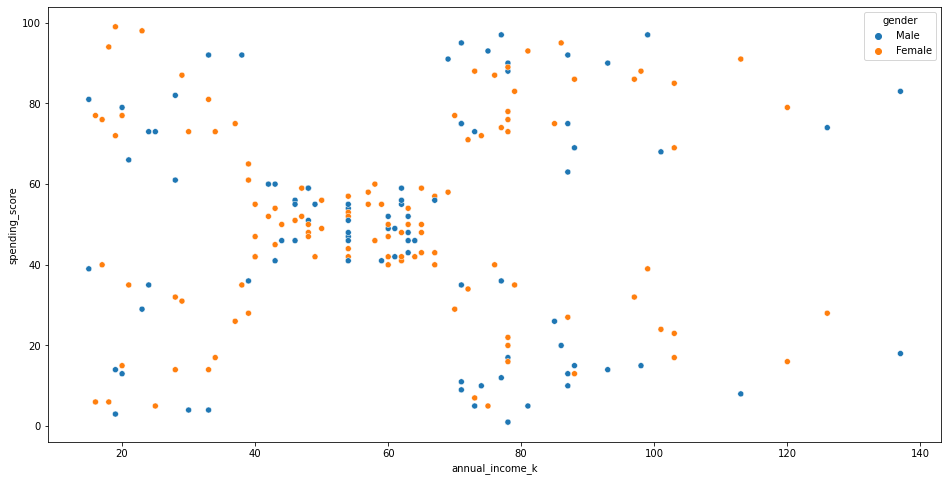

In [16]:
plt.figure(figsize=(16,8))

sns.scatterplot(x= df.annual_income_k, y= df.spending_score, hue=df.gender)

---
---

In [17]:
df_copy = df.copy()

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

We can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects us to determine the number of clusters (*n_clusters*). We can determine the optimal number of clusters for each cluster analysis in various ways. In this case, we will use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [18]:
df.iloc[:,[1,3]]

,age,spending_score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [19]:
X = df.iloc[:, [1,3]]
X.shape

(200, 2)

In [20]:
from sklearn.cluster import KMeans

K_means = KMeans(n_clusters=4, random_state=42)

K_means.fit(X)

KMeans(n_clusters=4, random_state=42)

In [21]:
K_means.labels_

array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [22]:
X["cluster"] = K_means.labels_
X

,age,spending_score,cluster
0,19,39,3
1,21,81,2
2,20,6,1
3,23,77,2
4,31,40,3
...,...,...,...
195,35,79,2
196,45,28,1
197,32,74,2
198,32,18,1


### Hopkins Test

In [23]:
X = X.drop("cluster", axis=1)

In [24]:
from pyclustertend import hopkins

hopkins(X, X.shape[0])

0.3326502688070753

#### *ii. Determine optimal number of clusters*

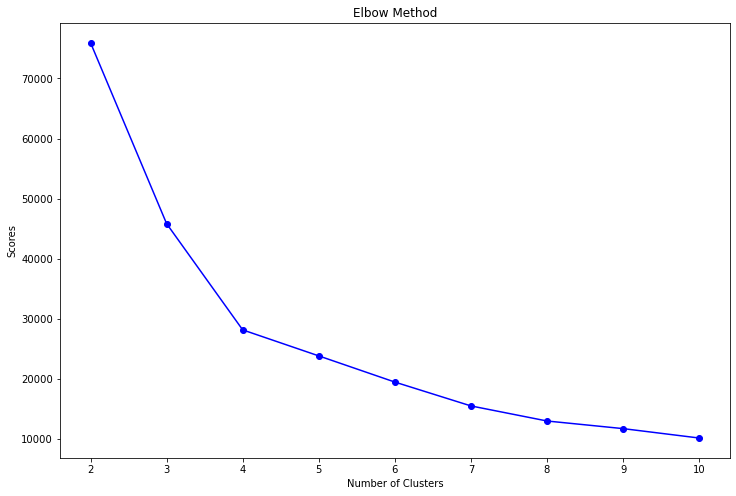

In [25]:
scores = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    scores.append(kmeans.inertia_)

plt.figure(figsize=(12,8))
plt.plot(range(2,11), scores, "bo-")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Scores")
plt.show()

In [26]:
scores

[75949.15601023012,
 45840.67661610871,
 28165.583566629342,
 23838.248821646197,
 19483.1179104427,
 15514.193134351033,
 13006.483628851032,
 11738.02029695451,
 10173.03947811448]

In [27]:
df_diff = pd.DataFrame(-pd.Series(scores).diff().rename(index= lambda x: x+1))

In [28]:
df_diff

,0
1,NaN
2,30108.479394
3,17675.093049
4,4327.334745
5,4355.130911
6,3968.924776
7,2507.709506
8,1268.463332
9,1564.980819


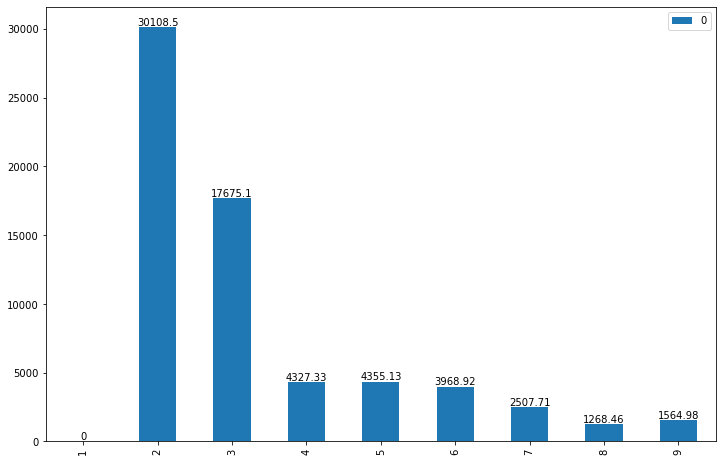

In [29]:
ax = df_diff.plot(kind="bar", figsize=(12,8))
ax.bar_label(ax.containers[0]);

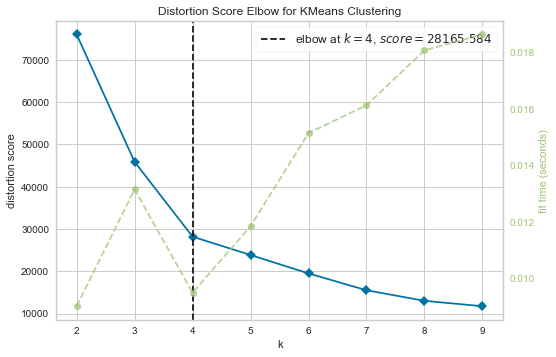

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
from yellowbrick.cluster import KElbowVisualizer

visu = KElbowVisualizer(K_means, k = (2,10))
visu.fit(X)
visu.poof()

In [31]:
from sklearn.metrics import silhouette_score
cluster_range = range(2,11)
silhoutte_scores = []

for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhoutte_scores.append(silhouette_avg)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")
print("-"*20)
print(f"The maximum silhouette score is {max(silhoutte_scores)}, and it corresponds to {silhoutte_scores.index(max(silhoutte_scores)) + 2} clusters")

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.43350225495428363
For n_clusters=6, the silhouette score is 0.4376965763059772
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.43215030177487107
For n_clusters=9, the silhouette score is 0.41485342159923116
For n_clusters=10, the silhouette score is 0.4141899863508767
--------------------
The maximum silhouette score is 0.49973941540141753, and it corresponds to 4 clusters


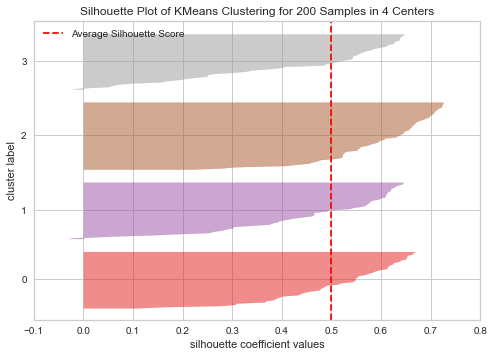

In [32]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)    
visualizer.poof();

In [33]:
for i in range(model.n_clusters):
    label = (model.labels_== i)
    print(f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0    : 0.5091299145013191
mean silhouette score for label 1    : 0.45429047261675404
mean silhouette score for label 2    : 0.5960779476836082
mean silhouette score for label 3    : 0.4197289676734112
mean silhouette score for all labels : 0.49973941540141753


#### *iii. Apply K Means*

In [34]:
kmeans_model = KMeans(n_clusters=4,random_state=42)
kmeans_model.fit(X)

KMeans(n_clusters=4, random_state=42)

In [35]:
kmeans_model.predict(X)

array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [36]:
X["kmeans_cluster"] = kmeans_model.predict(X)
X

,age,spending_score,kmeans_cluster
0,19,39,3
1,21,81,2
2,20,6,1
3,23,77,2
4,31,40,3
...,...,...,...
195,35,79,2
196,45,28,1
197,32,74,2
198,32,18,1


#### *iv. Visualizing and Labeling All the Clusters*

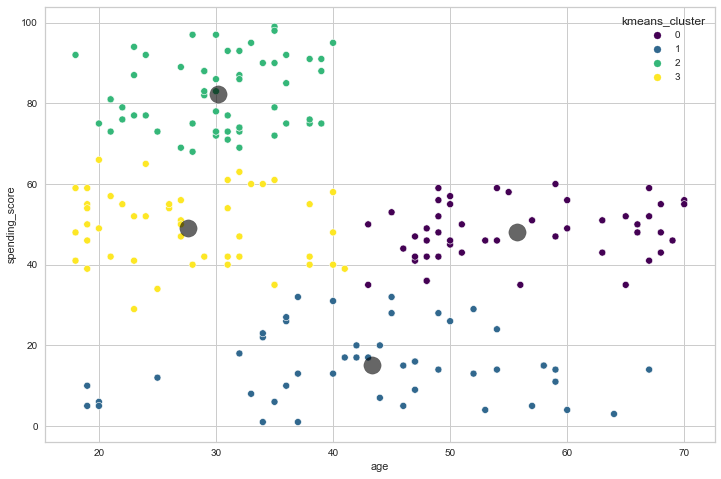

In [37]:
plt.figure(figsize=(12,8))

sns.scatterplot(x="age", y="spending_score", data=X, hue="kmeans_cluster", palette="viridis")
centers = kmeans_model.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c="black", s=300, alpha=0.6);

Basically, we can see 4 different clusters. 2 main clusters for people under 40, one of has spending scores more than 60 and the other one has lesser. One of the other clusters has mid level spending scora but this cluster occurs from overaged (older than 40) people. And finally, the last cluster occurs from different age groups but has low spending score. 

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [38]:
X2 = df.iloc[:,[2,3]]
X2

,annual_income_k,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [39]:
hopkins(X2,X2.shape[0])

0.3049212160160406

#### *ii. Determine optimal number of clusters*

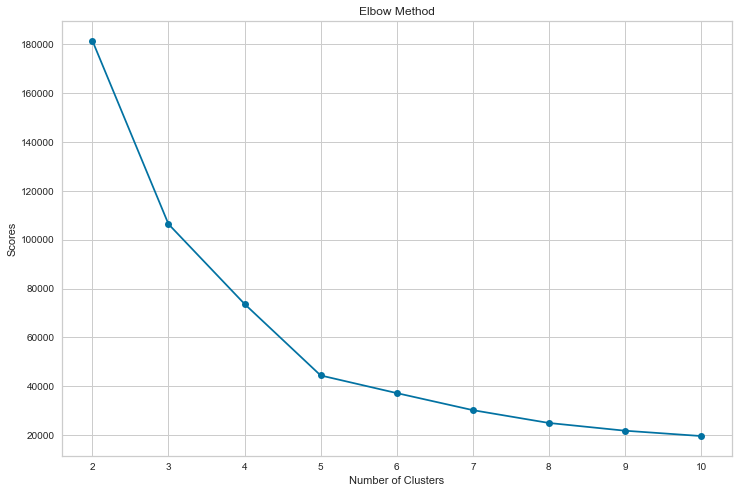

In [40]:
scores = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X2)
    scores.append(kmeans.inertia_)

plt.figure(figsize=(12,8))
plt.plot(range(2,11), scores, "bo-")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Scores")
plt.show()

In [41]:
df_diff = pd.DataFrame(-pd.Series(scores).diff().rename(index= lambda x: x+1))
df_diff

,0
1,NaN
2,75015.222897
3,32668.584023
4,29231.333592
5,7214.640937
6,6974.157303
7,5247.817858
8,3161.674067
9,2178.092434


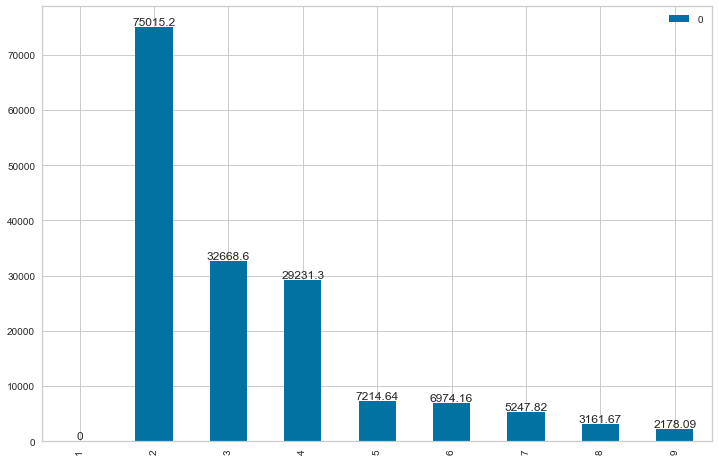

In [42]:
ax = df_diff.plot(kind="bar", figsize=(12,8))
ax.bar_label(ax.containers[0]);

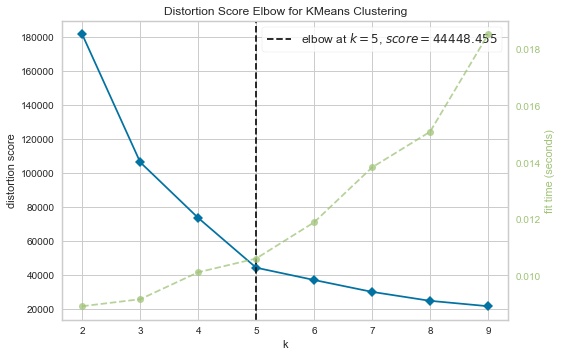

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [43]:
visu = KElbowVisualizer(K_means, k = (2,10))
visu.fit(X2)
visu.poof()

In [44]:
cluster_range = range(2,11)
silhoutte_scores = []

for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X2)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X2, cluster_labels)
    silhoutte_scores.append(silhouette_avg)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")
print("-"*20)
print(f"The maximum silhouette score is {max(silhoutte_scores)}, and it corresponds to {silhoutte_scores.index(max(silhoutte_scores)) + 2} clusters")

For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.53976103063432
For n_clusters=7, the silhouette score is 0.5264283703685728
For n_clusters=8, the silhouette score is 0.45827056882053113
For n_clusters=9, the silhouette score is 0.4565077334305076
For n_clusters=10, the silhouette score is 0.45925273534781125
--------------------
The maximum silhouette score is 0.553931997444648, and it corresponds to 5 clusters


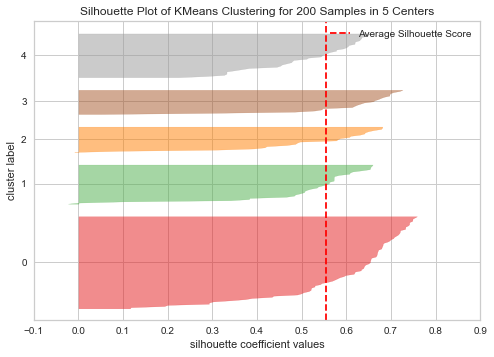

In [45]:
model = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X2)    
visualizer.poof();

#### *iii. Apply K Means*

In [46]:
kmeans_model2 = KMeans(n_clusters=5, random_state=42)
kmeans_model2.fit_predict(X2)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [47]:
X2["kmean_cluster"] = kmeans_model2.fit_predict(X2)
X2

,annual_income_k,spending_score,kmean_cluster
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2
...,...,...,...
195,120,79,4
196,126,28,1
197,126,74,4
198,137,18,1


#### *iv. Visualizing and Labeling All the Clusters*

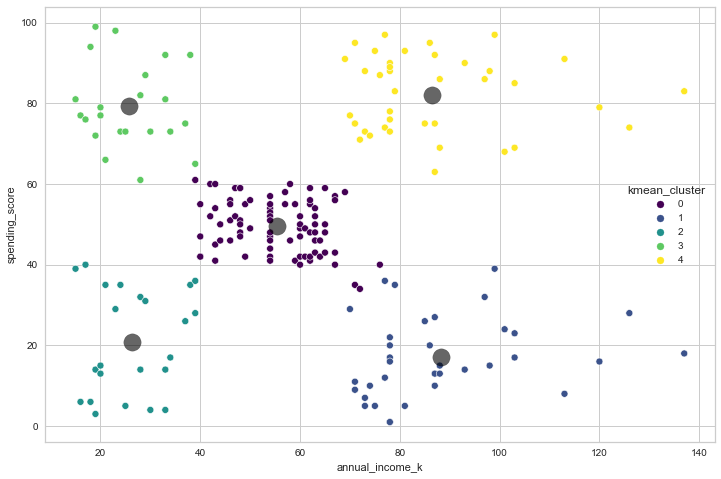

In [48]:
plt.figure(figsize=(12,8))

sns.scatterplot(x="annual_income_k", y="spending_score", data=X2, hue="kmean_cluster", palette="viridis")
centers = kmeans_model2.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c="black", s=300, alpha=0.6);

Mainly, we see there are 5 clusters for relation between spending scores and annual income. If our client's target is making the customers who has high annual income and low spending score, refers to cluster 1, spend more, s/he has to focus the cluster 1.

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [49]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [50]:
hc_ward = linkage(y=X, method="ward")
hc_complete = linkage(y=X, method="complete")
hc_single = linkage(y=X, method= "single")
hc_average = linkage(y=X, method="average")

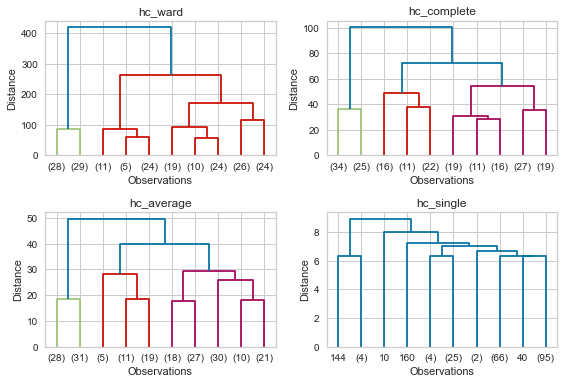

In [51]:
scorelist = ['hc_ward', 'hc_complete', 'hc_average', 'hc_single']

for i, col in enumerate([hc_ward, hc_complete, hc_average, hc_single]):
    plt.subplot(2, 2, i+1)     
    plt.title(f'{scorelist[i]}')
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    dendrogram(col, leaf_font_size=10,p=10, truncate_mode="lastp")
    plt.tight_layout()

In [52]:
silhoutte_scores = []

for num_cluster in range(2,11):
    agg_model = AgglomerativeClustering(n_clusters= num_cluster)
    agg_model.fit(X)
    
    cluster_labels = agg_model.labels_
    
    avg_silhoutte = silhouette_score(X, cluster_labels)
    silhoutte_scores.append(avg_silhoutte)
    print(f"Silhoutte score for {num_cluster} clusters: {avg_silhoutte}")
print("-"*20)
print(f"The maximum silhouette score is {max(silhoutte_scores)}, and it corresponds to {silhoutte_scores.index(max(silhoutte_scores)) + 2} clusters")

Silhoutte score for 2 clusters: 0.45437524400798707
Silhoutte score for 3 clusters: 0.4403939907045589
Silhoutte score for 4 clusters: 0.4605877438219549
Silhoutte score for 5 clusters: 0.4039101313348303
Silhoutte score for 6 clusters: 0.4122277010437696
Silhoutte score for 7 clusters: 0.4154024433868577
Silhoutte score for 8 clusters: 0.387772181711837
Silhoutte score for 9 clusters: 0.39419016298118076
Silhoutte score for 10 clusters: 0.38799839181574464
--------------------
The maximum silhouette score is 0.4605877438219549, and it corresponds to 4 clusters


## Clustering based on Annual Income and Spending Score- x2

In [53]:
hc_ward2 = linkage(y=X2, method="ward")
hc_complete2 = linkage(y=X2, method="complete")
hc_single2 = linkage(y=X2, method= "single")
hc_average2 = linkage(y=X2, method="average")

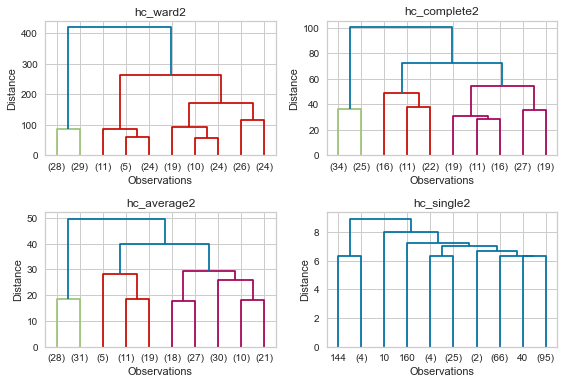

In [54]:
scorelist = ['hc_ward2', 'hc_complete2', 'hc_average2', 'hc_single2']

for i, col in enumerate([hc_ward, hc_complete, hc_average, hc_single]):
    plt.subplot(2, 2, i+1)     
    plt.title(f'{scorelist[i]}')
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    dendrogram(col, leaf_font_size=10,p=10, truncate_mode="lastp")
    plt.tight_layout()

In [55]:
silhoutte_scores = []

for num_cluster in range(2,11):
    agg_model = AgglomerativeClustering(n_clusters= num_cluster)
    agg_model.fit(X2)
    
    cluster_labels = agg_model.labels_
    
    avg_silhoutte = silhouette_score(X2, cluster_labels)
    silhoutte_scores.append(avg_silhoutte)
    print(f"Silhoutte score for {num_cluster} clusters: {avg_silhoutte}")
print("-"*20)
print(f"The maximum silhouette score is {max(silhoutte_scores)}, and it corresponds to {silhoutte_scores.index(max(silhoutte_scores)) + 2} clusters")

Silhoutte score for 2 clusters: 0.36737734620684265
Silhoutte score for 3 clusters: 0.462308734038414
Silhoutte score for 4 clusters: 0.4924899099064366
Silhoutte score for 5 clusters: 0.5541332798644271
Silhoutte score for 6 clusters: 0.5390996397382017
Silhoutte score for 7 clusters: 0.520894822141792
Silhoutte score for 8 clusters: 0.43313054817610713
Silhoutte score for 9 clusters: 0.43944465774630276
Silhoutte score for 10 clusters: 0.4345958236001419
--------------------
The maximum silhouette score is 0.5541332798644271, and it corresponds to 5 clusters


### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [56]:
agg_mod1 = AgglomerativeClustering(n_clusters=4)
y_agg = agg_mod1.fit_predict(X)

In [57]:
X["cluster_agg"] = y_agg
X = X.reset_index()

#### Annual Income and Spending Score- x2

In [58]:
agg_mod2 = AgglomerativeClustering(n_clusters=5)
y_agg2 = agg_mod2.fit_predict(X2)

In [59]:
X2["cluster_agg"] = y_agg2
X2

,annual_income_k,spending_score,kmean_cluster,cluster_agg
0,15,39,2,4
1,15,81,3,3
2,16,6,2,4
3,16,77,3,3
4,17,40,2,4
...,...,...,...,...
195,120,79,4,2
196,126,28,1,0
197,126,74,4,2
198,137,18,1,0


### iii. *Visualizing and Labeling All the Clusters* 

#### Age and Spending Score- x1

<AxesSubplot:xlabel='age', ylabel='spending_score'>

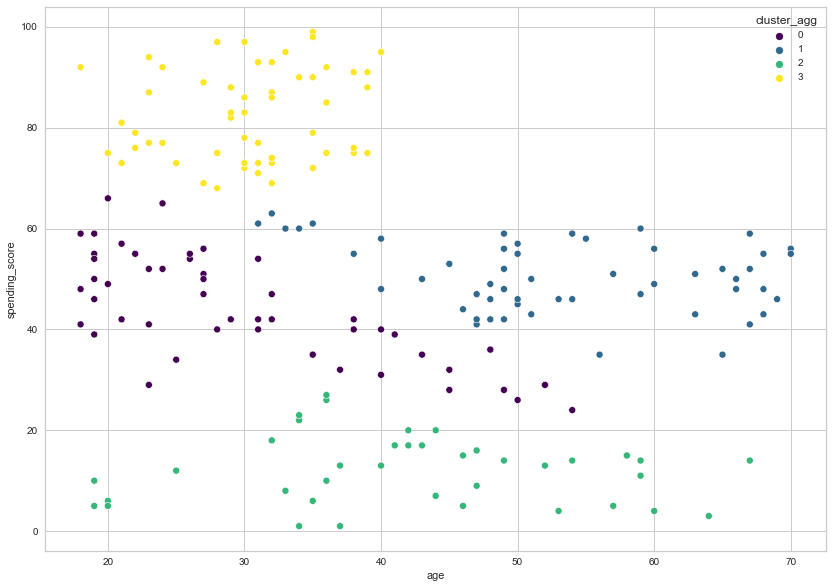

In [60]:
plt.figure(figsize=(14,10))
sns.scatterplot(data=X, x= "age", y= "spending_score", hue="cluster_agg", palette="viridis")

#### Annual Income and Spending Score- x2

<AxesSubplot:xlabel='annual_income_k', ylabel='spending_score'>

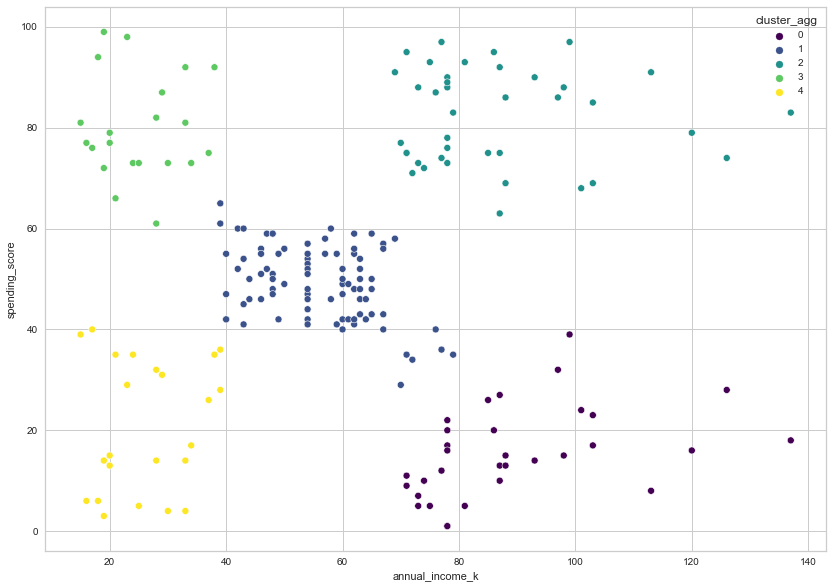

In [61]:
plt.figure(figsize=(14,10))
sns.scatterplot(data=X2, x= "annual_income_k", y= "spending_score", hue="cluster_agg", palette="viridis")

#### Interpretation based on Age and Spending Score- x1

In [62]:
X.head()

,index,age,spending_score,kmeans_cluster,cluster_agg
0,0,19,39,3,0
1,1,21,81,2,3
2,2,20,6,1,2
3,3,23,77,2,3
4,4,31,40,3,0


In [63]:
X.kmeans_cluster.value_counts()

2    57
1    48
0    48
3    47
Name: kmeans_cluster, dtype: int64

In [64]:
X.cluster_agg.value_counts()

3    57
1    53
0    50
2    40
Name: cluster_agg, dtype: int64

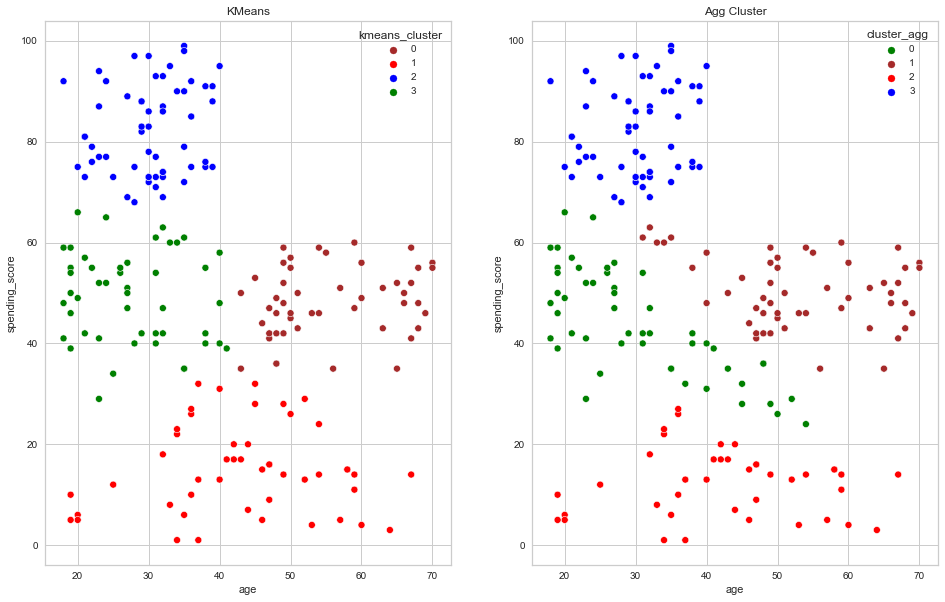

In [65]:
plt.figure(figsize=(16,10))


plt.subplot(121)
plt.title("KMeans")
sns.scatterplot(x="age", y="spending_score", data=X, hue="kmeans_cluster", palette=["brown", "red", "blue"
                                                                                    , "green"])

plt.subplot(122)
plt.title("Agg Cluster")
sns.scatterplot(data=X, x= "age", y= "spending_score", hue="cluster_agg", palette=["green" ,"brown","red", "blue"
                                                                                    ])

plt.show()

When we come to compare two clustering models by drawing the points, we obviously see that some points are vaguely painted, especially for mid-age people. Therefore, we should choose the kmeans model for interpetation.

In [66]:
df["kmeans_clusters"] = X.kmeans_cluster
df

,gender,age,annual_income_k,spending_score,kmeans_clusters
0,Male,19,15,39,3
1,Male,21,15,81,2
2,Female,20,16,6,1
3,Female,23,16,77,2
4,Female,31,17,40,3
...,...,...,...,...,...
195,Female,35,120,79,2
196,Female,45,126,28,1
197,Male,32,126,74,2
198,Male,32,137,18,1


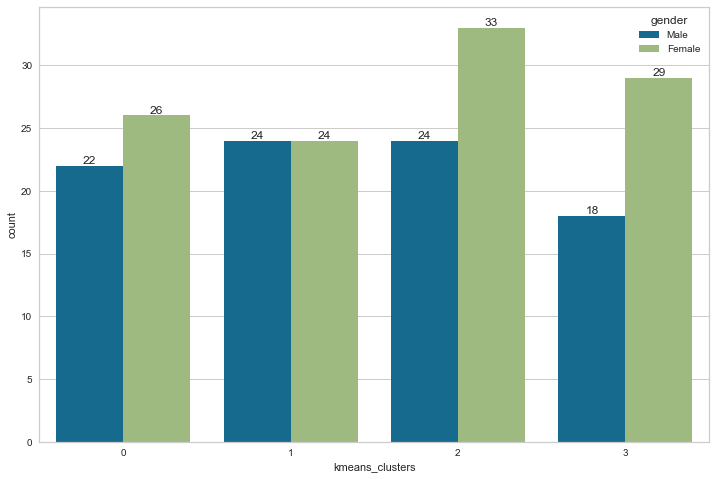

In [67]:
plt.figure(figsize=(12,8))
ax = sns.countplot(data=df, x="kmeans_clusters", hue= "gender")
for p in ax.containers:
    ax.bar_label(p)

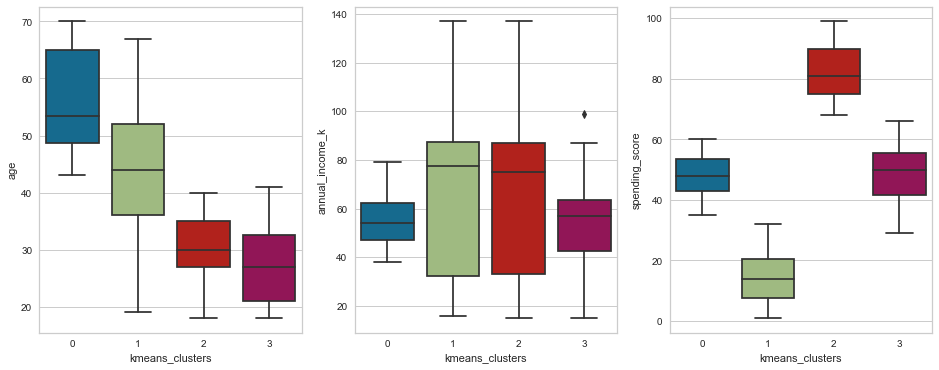

In [68]:
plt.figure(figsize=(16,6))
columns = ["age", "annual_income_k", "spending_score"]

for count, i in enumerate(columns):
    plt.subplot(1,3,count+1)
    sns.boxplot(data=df, y=i, x="kmeans_clusters")

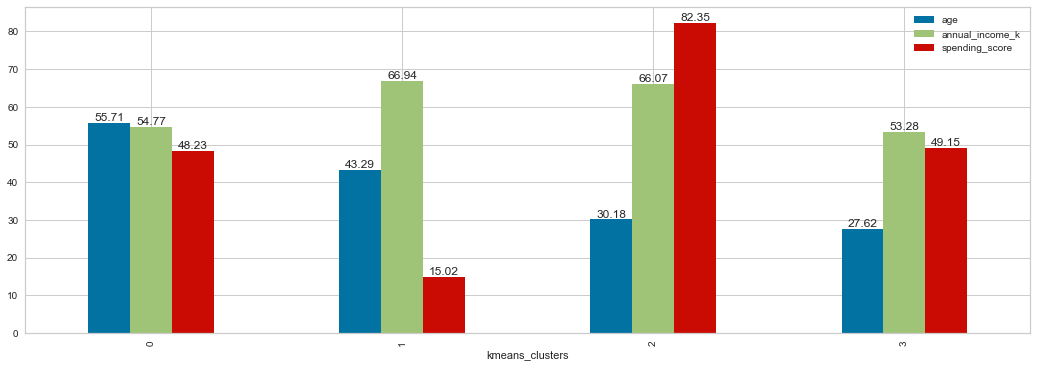

In [69]:
ax = df.groupby("kmeans_clusters").mean().plot(kind= "bar", figsize=(18,6))
for i in ax.containers:
    ax.bar_label(i,fmt="%.2f")

### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low. 
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

In [70]:
X2.head()

,annual_income_k,spending_score,kmean_cluster,cluster_agg
0,15,39,2,4
1,15,81,3,3
2,16,6,2,4
3,16,77,3,3
4,17,40,2,4


In [71]:
X2.kmean_cluster.value_counts()

0    81
4    39
1    35
2    23
3    22
Name: kmean_cluster, dtype: int64

In [72]:
X2.cluster_agg.value_counts()

1    85
2    39
0    32
4    23
3    21
Name: cluster_agg, dtype: int64

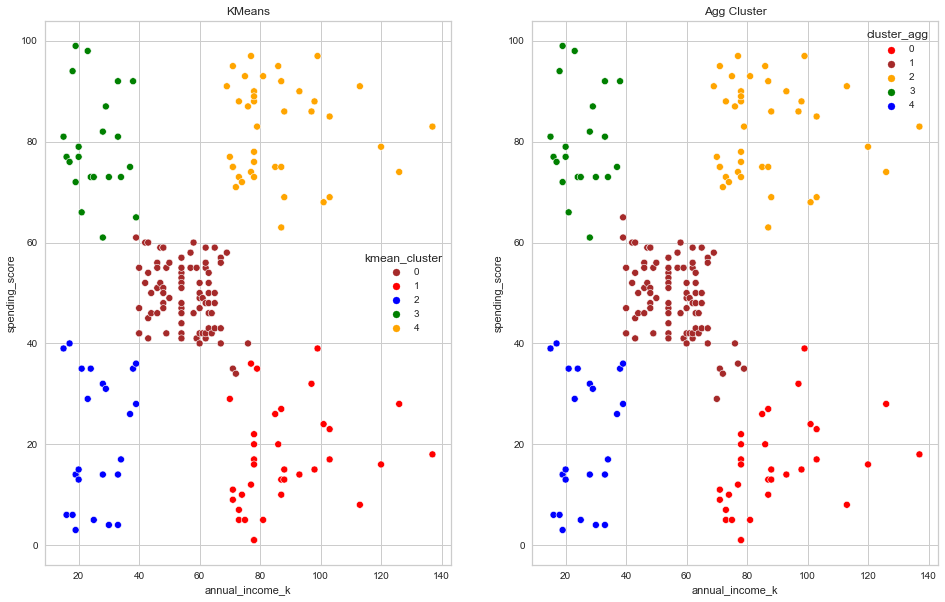

In [73]:
plt.figure(figsize=(16,10))


plt.subplot(121)
plt.title("KMeans")
sns.scatterplot(x="annual_income_k", y="spending_score", data=X2, hue="kmean_cluster", 
                palette=["brown", "red", "blue", "green","orange"])

plt.subplot(122)
plt.title("Agg Cluster")
sns.scatterplot(data=X2, x= "annual_income_k", y= "spending_score", hue="cluster_agg", 
                palette=["red","brown","orange", "green","blue"])

plt.show()

As agglomerative clustering grouped more accurate, we should consider that model to make a better conclusion.

In [74]:
df.drop(columns="kmeans_clusters",inplace=True)

In [75]:
df["agg_clusters"] = X2.cluster_agg
df

,gender,age,annual_income_k,spending_score,agg_clusters
0,Male,19,15,39,4
1,Male,21,15,81,3
2,Female,20,16,6,4
3,Female,23,16,77,3
4,Female,31,17,40,4
...,...,...,...,...,...
195,Female,35,120,79,2
196,Female,45,126,28,0
197,Male,32,126,74,2
198,Male,32,137,18,0


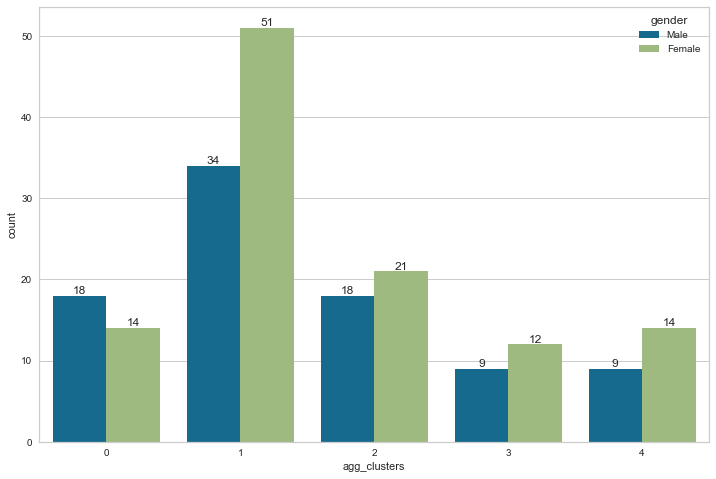

In [76]:
plt.figure(figsize=(12,8))
ax = sns.countplot(data=df, x="agg_clusters", hue= "gender")
for p in ax.containers:
    ax.bar_label(p)

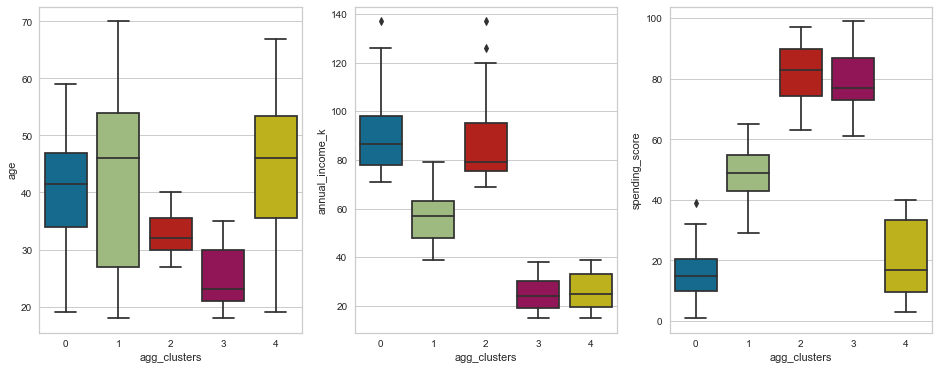

In [77]:
plt.figure(figsize=(16,6))

for count, i in enumerate(columns):
    plt.subplot(1,3,count+1)
    sns.boxplot(data=df, y=i, x="agg_clusters")

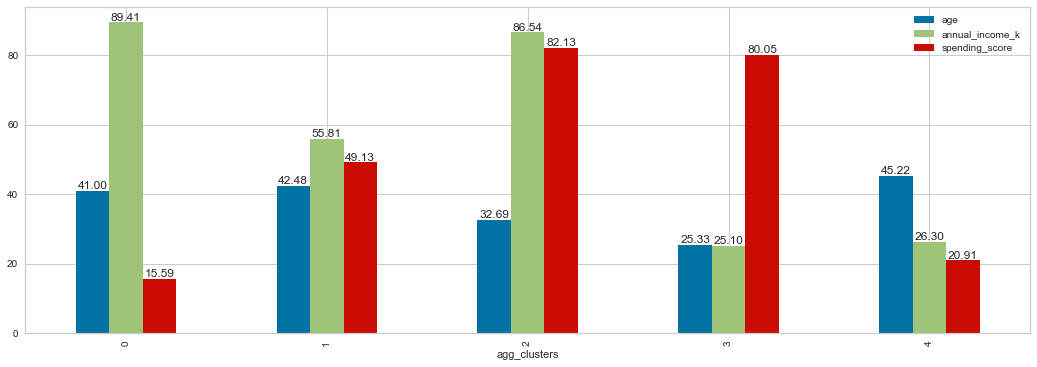

In [78]:
ax = df.groupby("agg_clusters").mean().plot(kind= "bar", figsize=(18,6))
for i in ax.containers:
    ax.bar_label(i,fmt="%.2f")

**cluster 0** : The average age is around 41, their annual income is very high but their spending_score is very low. This group is our target audience and special strategies need to be developed for this 
group.

**cluster 1**: The average age is around 42, both annula_income and spending_scores are average. It should be researched what can be done to direct more spending.

**cluster 2** :The average age is around 32. Both annula_income and spending_scores are high. This group consists of our loyal customers. Our company derives the main profit from this group. Very special promotions can be made in order not to miss it.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 45, both annula_income and spending_scores are low. It can be directed to shopping with gift certificates.

## Conclusion

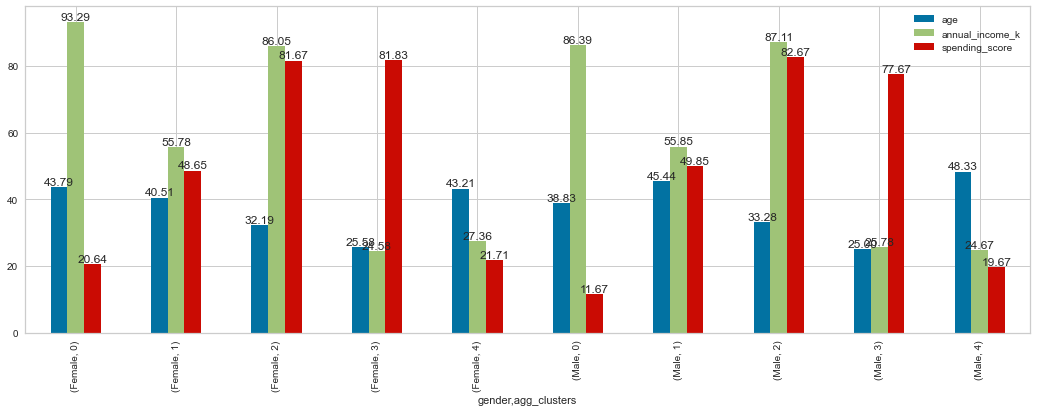

In [79]:
ax = df.groupby(["gender","agg_clusters"]).mean().plot(kind= "bar", figsize=(18,6))
for i in ax.containers:
    ax.bar_label(i,fmt="%.2f")

### Female

**cluster 0** : The average age is around 43,  annula_income is very high and spending_scores are low. This group is our target audience and special strategies need to be developed for this group. 

**cluster 1**: The average age is around 40, both annula_income and spending_scores is average. It should be researched what can be done to direct more spending.

**cluster 2** :The average age is around 32. Both annula_income and spending_scores are high. This group consists of our loyal customers. Our company derives the main profit from this group. Very special promotions can be made in order not to miss it.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 43, the annual income and the spending_score is very low. It can be directed to shopping with gift certificates.

### Male

**cluster 0** : The average age is around 38, annula_income is very high and spending_scores are low.
This group is our target audience and special strategies need to be developed for this group. 

**cluster 1**: The average age is around 45, tboth annula_income and spending_scores is average.
It should be researched what can be done to direct more spending.    

**cluster 2** :The average age is around 33. Both annula_income and spending_scores are high. This group consists of our loyal customers. Our company derives the main profit from this group. Very special promotions can be made in order not to miss it.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 48, the annual income and the spending_score is very low.  It can be directed to shopping with gift certificates.

----------

 **THANK YOU**